# Introduction to Data Analysis 

In this section of the tutorial, we'll gain an understanding for how to approach a **machine learning** problem and implement a benchmark machine learning algorithm. 

We'll start with a common dataset in the standard **attribute-predictor format**, and then venture into machine learning with **image data**. 

### Attribute-Predictor Data
Let's first load our dataset. We'll look at the common **Breast Cancer dataset**, available in **ARFF** format. 

This dataset contains statistical information about **cell nuclei** as seen in digitized images from from breast mass fine needle aspirates (FNA), a common type of biopsy. 

The information in each example either represents a group of benign or malignant cancer nuclei. 

Our **Goal** is to use machine learning to **recognize a relationship** between the statistical information (`data`) and the `label` of "malignant" or "benign", so we can *predict malignancy in new images* that do not have a label assigned to them. 

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [83]:
bc = load_breast_cancer()
print(bc.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

The first thing to notice is that our data are organized into **attributes**. 

These can be thought of as *categorical properties* of the dataset, representing various **aspects** of the data. It looks like we have **10 properties**, each of which is represented by **3 statistical measures**: mean, standard error, and largest values. 

+ The **mean** offers the average of an attribute's values for a given instance, providing *summary* information. 
+ The **standard deviation** offers information about the *variance* of the attribute's values; 
    + i.e., how much do the values deviate from the mean. 
+ The **largest value** is a less common statistic, but seems fitting for cancer data, in which we expect cell nuclei of malignant cancer cells to be larger than benign cancer nuclei. 

Each **example** or **instance** of our data represents a separate fine needle aspirate with its own nuclei characteristics. 

In [212]:
bc_df = pd.DataFrame(bc.data, columns=bc.feature_names)
bc_df.insert(len(bc_df.columns), 'target', bc.target)

In [36]:
bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Data Exploration

It's always a good idea to explore your data a bit before throwing it into an algorithm.

This can help you find **anomolies** in the data, determine what **preprocessing** steps may be needed, choose which types of **algorithms** to use, etc. 

#### Histogram

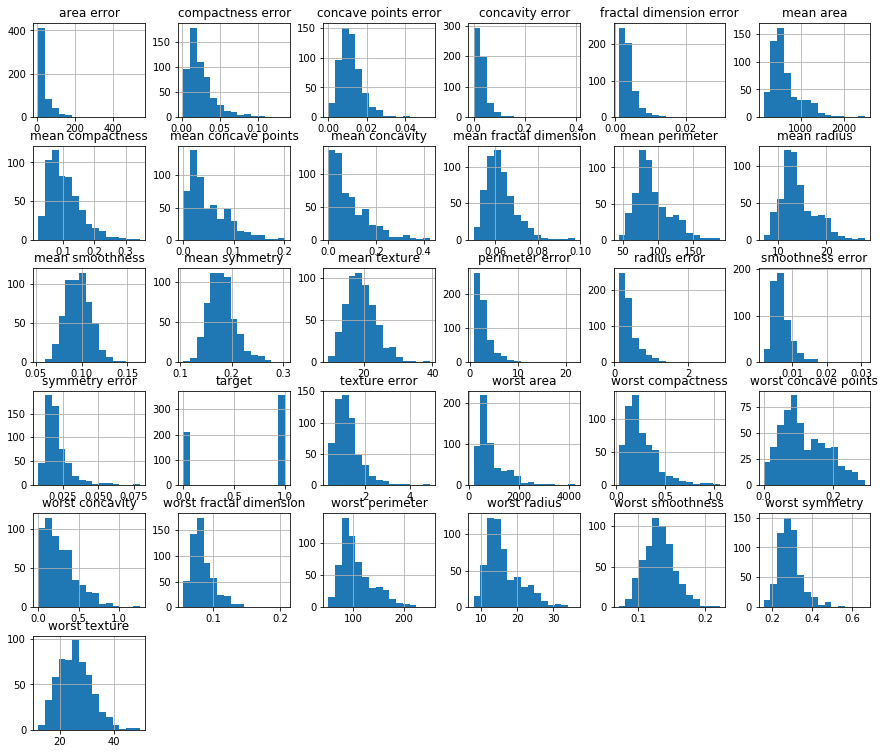

In [93]:
hist = bc_df.hist(bins=15, figsize=(15,13))

Histograms show the **distribution** of an attribute, and can allow us to form initial **hypotheses** about the data. 

Above, we see that many of the mean and "worst" attributes are **normally distributed**, and many of the "error" attributes show highest frequency around 0 and a tail to the right. Both of these are expected. 

We also see a tendency for **skewness** in the distributions toward the right. We might hypothesize that malignant nuclei tend to have larger means and larger "worst" statistics, and are thus responsible for the right skew.

It can be useful to compare the distributions of various attributes. For example, let's look at the **means**.

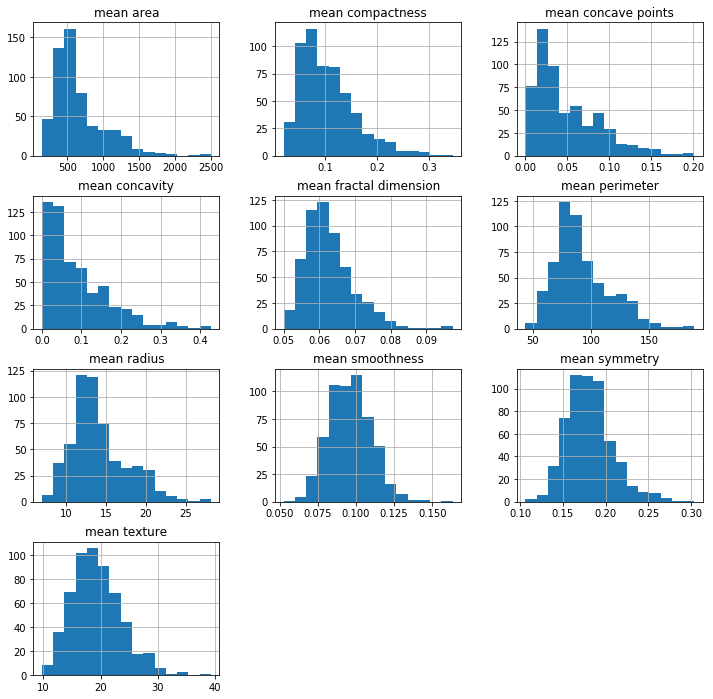

In [96]:
means = list([att for att in bc.feature_names if 'mean' in att])
hist = bc_df[means].hist(bins=15, figsize=(12,12))

Unfortunately, the ranges for these attributes are not the same, so direct comparison is not feasible. Let's **standardize** the values. 

In [213]:
from sklearn.preprocessing import MinMaxScaler

x = bc_df.iloc[:,:len(bc_df.columns)-1].values #returns a numpy array

min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

bc_df = pd.DataFrame(x_scaled, columns=bc.feature_names)
bc_df.insert(len(bc_df.columns), 'target', bc.target)

bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0


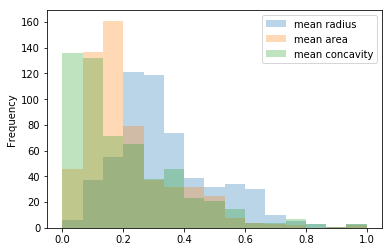

In [117]:
hist = bc_df[['mean radius','mean area','mean concavity']].plot.hist(bins=15, alpha=0.3)

#### Relationship

Next, let's look at the relationship between an attribute and the binary predictor. 

We see that `mean concavity` has the highest skewed histogram. Based on our hypothesis that skewness is due to malignancy, let's check the predictive value of this attribute. 

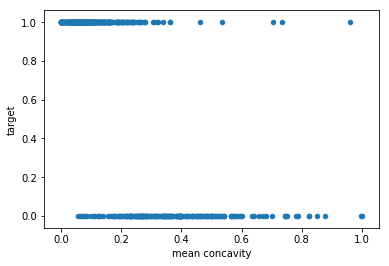

In [122]:
scatt = bc_df.plot.scatter(x='mean concavity',y='target')

We can see that values below ~0.04 will most certainly be classified as `benign` (class label of `0` = malignant) and above 0.39 will likely be labeled `malignant`. 

There's still considerable overlap between 0.04 and 0.4, so let's see if information from *other attributes* helps us predict the right class.

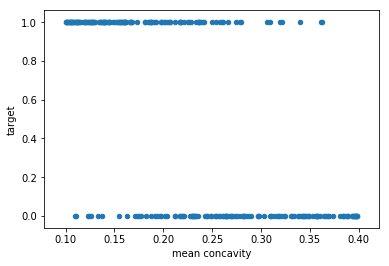

In [125]:
overlap = bc_df[(bc_df['mean concavity'] >= 0.04) & (bc_df['mean concavity'] <= 0.4)]
scatt1 = overlap.plot.scatter(x='mean concavity', y='target')

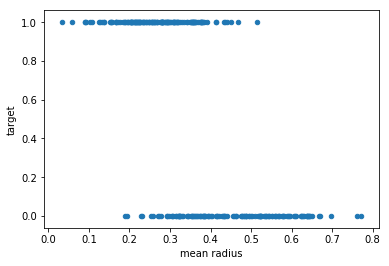

In [141]:
scatt2 = overlap.plot.scatter(x='mean radius', y='target')

It is now apparent that among the examples with `mean concavity` values between 0.04 and 0.4, if an example has `mean radius` of 0.25 or less, we will predict `benign`, and we will predict `malignant` for values above 0.39. 

Now, our uncertainty is reduced to examples with `mean concavity` between 0.04-0.4 *and* `mean radius` between 0.25-0.39. 

In [162]:
print(f"Our uncertainty based solely on Mean Concavity consists of {len(overlap)} values.")

overlap2 = overlap[(overlap['mean radius']>= 0.25) & (overlap['mean radius'] <= 0.39)]
print(f"And our uncertainty based on Mean Concavity AND Mean Radius consists of {len(overlap2)} values.")

print(f"We've reduced our uncertainty by a factor of {len(overlap)/len(overlap2):.2f}!!")

Our uncertainty based solely on Mean Concavity consists of 271 values.
And our uncertainty based on Mean Concavity AND Mean Radius consists of 113 values.
We've reduced our uncertainty by a factor of 2.40!!


Given this newfound confidence, let's design a **classification rule** that predicts `benign` if the values are below 0.35 and `malignant` if they're above. 

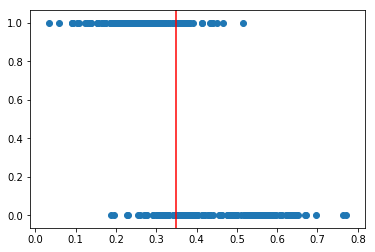

In [170]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

fig = plt.scatter(overlap['mean radius'], overlap['target'])
plt.axvline(x=0.35,color='red')

Essentially, we've manually conducted two steps of a **decision tree**. 

Our decision tree works as follows: 
1. If `mean concavity` < 0.04: `target` = `benign`
2. If `mean concavity` > 0.4: `target` = `malignant`
3. If `mean radius` < 0.35: `target` = `benign`
4. Otherwise, `target`=`malignant`


In [323]:
pred=[]
for idx in range(len(bc_df['target'])):
    if bc_df['mean concavity'][idx]<0.04: pred.append(1)
    elif bc_df['mean concavity'][idx]>0.4: pred.append(0)
    elif bc_df['mean radius'][idx]<0.35: pred.append(1)
    else: pred.append(0)

misclass=0
for predxn in range(len(pred)):
    if pred[predxn]!=bc_df['target'][predxn]: misclass+=1

error = misclass/len(bc_df)*100

print(f"Our decision tree achieved {100-error:.2f}% accuracy.")

Our decision tree achieved 86.99% accuracy.


## Intro to Machine Learning

We've just manually / conceptually performed a very basic algorithm for data analysis, similar to those used by machine learning alorithms. 

Our algorithm:
1. We first performed a "prediction" using a single attribute. 
2. We (conceptually) saw that predicting based on this single attribute results in large uncertainty. 
    + Uncertainty is a source of **misclassifications**, or **error** in our predictions. 
3. We then **updated** our initial model, thereby improving our prediction. 

Machine learning algorithms attempt to **model some aspect(s) the data space** by making predictions, observing the error from those predictions, and updating the model to reduce the error. 

### Linear Regression

Our prediction above could be improved in two wasy:
1. We only use two of the 30 attributes. 
    + Manual analysis of more than 2-3 attributes at a time is very difficult
2. We used a vertical line to separate the data.
    + It is difficult to manually estimate what slope a line should be and where the center of mass in a group of data lies.

**Linear regression** seeks to "**fit**" the data points so as to describe the target variable *as a function of* the data. I.e., as values of the data change along this line of best fit, the corresponding target value should change in a linear and predictable way. 

Recall: ` y = mx + b `

This hallmark equation from grade school shows how a group of data points (`x`) can undergo simple linear combinations to produce an output (`y`). Here, `m` represents the **slope** and `b` is our **bias** term. 

In Statistics, we typically write this as $y = \beta_{1} x + \beta_{0}$. We express the output in terms of the **expectation** of **random variable Y *given* data X**, $\mathop{\mathbb{E}}[Y | X]$.

( The bias represents information about our output `y` that the model `mx` cannot or does not predict, termed **uncontrollable error**. If there were no relationship between `y` and `x` (i.e., the **null hypothesis** $\beta_0$), then we would set `m`=0 and use solely the bias term `b` to predict a constant value `y`=`b`. Typically, however, the bias helps account for noise in the data, which we do not want our model to predict. )

We can extend the equation to predict many points **`y`** from a vector of inputs **`x`**. Linear regression finds the single value `m` that, when applied to each individual `x`, predicts an output `y`. This gives us a single value `m` that describes the entire dataset.  

The output `y` is a vector of **probabilities**

In [324]:
train = bc_df.iloc[:int(len(bc_df)*0.8)]
test = bc_df.iloc[int(len(bc_df)*0.8):]
test_labels = test['target']
test = test.drop('target',axis=1)

In [261]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(train['mean concavity'].values.reshape(-1,1), train['target'].values.reshape(-1,1))
m = reg.coef_
b = reg.intercept_
simple_pred = reg.predict(test['mean concavity'].values.reshape(-1,1))

for sp in range(len(simple_pred)):
    if simple_pred[sp]>=0.5: simple_pred[sp]=1
    else: simple_pred[sp]=0

In [226]:
misclass=0
for predxn in range(len(simple_pred)):
    if simple_pred[predxn]!=test_labels.values[predxn]: misclass+=1

error = misclass/len(test_labels)*100
print(f"Our decision tree achieved {100-error:.2f}% accuracy.")

Our decision tree achieved 93.86% accuracy.


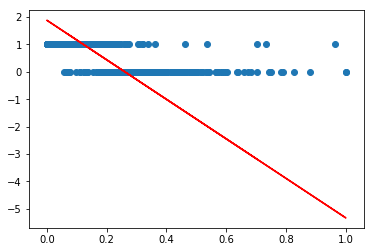

In [287]:
fig = plt.scatter(train['mean concavity'], train['target'])
lobf = m * train['mean concavity'].values.reshape(-1,1) + b
plt.plot(train['mean concavity'].values,lobf,color='red')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


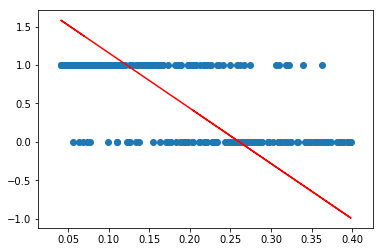

In [297]:
fig = plt.scatter(train['mean concavity'][(train['mean concavity']>=0.04) & (train['mean concavity'] <= 0.4)], train['target'][(train['mean concavity']>=0.04) & (train['mean concavity'] <= 0.4)])
lobf = m * train['mean concavity'][(train['mean concavity']>=0.04) & (train['mean concavity'] <= 0.4)].reshape(-1,1) + b
plt.plot(train['mean concavity'][(train['mean concavity']>=0.04) & (train['mean concavity'] <= 0.4)],lobf,color='red')

#### Multiple Linear Regression

Linear regression is further extendable to predict outcomes `y` given any number of attributes. Our input vector **`x`** becomes our dataset matrix `X`, with a column for each attribute and a row for each instance. 

We now fit a `m` **coefficient** for *each* attribute, resulting in a **`m`** vector. Similarly, each attribute gets a bias term. 

In [267]:
mult_reg = LinearRegression().fit(train.iloc[:,:-1].values, train['target'].values)
mult_pred = mult_reg.predict(test.values)

for mp in range(len(mult_pred)):
    if mult_pred[mp]>=0.5: mult_pred[mp]=1
    else: mult_pred[mp]=0

In [268]:
misclass=0
for predxn in range(len(mult_pred)):
    if mult_pred[predxn]!=test_labels.values[predxn]: misclass+=1

error = misclass/len(test_labels)*100
print(f"Our decision tree achieved {100-error:.2f}% accuracy.")

Our decision tree achieved 97.37% accuracy.


### Logistic Regression

There are some limitations with Linear Regression. As can be seen in the plot above, the result of linear regression is a **line** of best fit with range -$\infty$ to $\infty$. 

However, since we are dealing with **classification**, we only want predictions at 0 or 1. 

It is difficult to interpret what a prediction less than 0 or greater than 1 means. 

Additionally, we must arbitrarily set a **threshold** between 0 and 1, above which all predictions become `1` and below which all predictions become `0`. If many predictions are near the threshold, the potential for error is high. 

As such, it is desirable to define the line of best fit as a **sigmoid** curve.

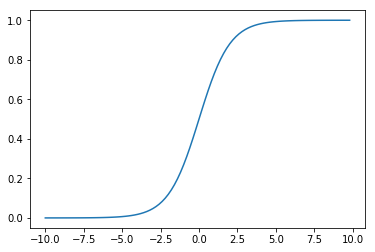

In [270]:
""" source: http://squall0032.tumblr.com/post/77300791096/plotting-a-sigmoid-function-using """
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.plot(x,sig)
plt.show()

As we can see, the sigmoid curve lies in the range [0,1] and concentrates most of its values around 0 and 1. The "s"-like curvature keeps the function continuous, meaning it is differentiable. We'll return to this point in the next section. 

As we can see above, the equation for the sigmoid function is $\frac{1}{1+e^{-x}}$ which can be rewritten $\log \frac{p(x)}{1-p(x)}$, where $p(x) = \mathop{\mathbb{P}}[Y=1 | X=x]$.

The model for logistic regression, then, is $\log \frac{p(x)}{1-p(x)} = \beta^Tx + \beta_{0}$.

Solving for this gives $p(x;\beta) = \frac{1}{1 + e^{-(\beta^Tx + \beta_{0})}}$.

Now we have our new model for our data; we aim to fit this model to our data by tuning the coefficients $\beta$.

In [273]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(train.iloc[:,:-1].values, train['target'].values)
logr_pred = logreg.predict(test.values)

In [274]:
misclass=0
for predxn in range(len(logr_pred)):
    if logr_pred[predxn]!=test_labels.values[predxn]: misclass+=1

error = misclass/len(test_labels)*100
print(f"Our decision tree achieved {100-error:.2f}% accuracy.")

Our decision tree achieved 99.12% accuracy.


### Optimization

We've seen two examples of *modeling* the data, as either a straight line or a sigmoid curve. However, both of these models involve **parameters** that need to be solved to make the models **fit** the data. 

There are infinite possible straight lines or sigmoid curve variations we could potentially model the data with. We need to find the *best fit* in an efficient way... 

**Optimization** is the process of **maximizing** some parameterized **function** based on a **metric** (or **minimizing** based on its negative).

##### Which objective function are we minimizing?

For the case of **linear regression**, it is simple to look at the *number of misclassified examples*, or the **error** on our predections.

More specifically, the L2 loss for linear regression, aka the **least squares equation**: 

<p style="text-align: center;"> $l(x_{i}, y_{i}) = (y_{i} - (\beta x_{i} + \beta_{0}))^T(y_{i} - (\beta x_{i} + \beta_{0}))$ </p>

When dealing with the entire dataset, we'll combine $\beta_{0}$ with vector $\beta$ and add a dummy column of 1's to X:

<p style="text-align: center;"> $l(X, y) = (y - \beta^T X)^2$ </p>

**Logistic regression** has some interesting properties that let's us minimize its function more directly. 

If we suppose `y` to take the values -1 and 1 instead of 0 and 1, we can represent `y` as follows: 

<p style="text-align: center;"> $\mathop{\mathbb{P}}[Y=1 | X=x] = \frac{1}{1 + e^{-(\beta^TX)}}$ and $\mathop{\mathbb{P}}[Y=-1 | X=x] = \frac{1}{1 + e^{(\beta^TX)}}$ </p>

This can be simplified to: $\mathop{\mathbb{P}}[Y=y | X=x] = \frac{1}{1 + e^{(-y \beta^TX)}} = \sigma(-y \beta^TX)$

For each class, we seek to **maximize** the probability that Y=y given the data, by fitting our parameters $\beta$ to the data. This is referred to as the **maximum likelihood equation**: 

<p style="text-align: center;"> ${\displaystyle \max_{\beta \epsilon \Theta}} {\mathop{\mathcal{L}}}(\beta;X)$

where $\Theta$ represents the parameter space of all possible parameter values.

This is solved as 

$$
\begin{aligned}
 {\displaystyle \max_{\beta \epsilon \Theta}} {\mathop{\mathcal{L}}}(\beta;X) &= p((x_{1},y_{1}),(x_{2},y_{2}),...,(x_{n},y_{n});\beta) \\
 &= {\displaystyle \prod_{i=1}^{n} p(x_{i},y_{i}; \beta)} \\
 &= {\displaystyle \prod_{i=1}^{n} {\rm p}^{y_{i}}(1-{\rm p})^{(1-y_{i})}},
\end{aligned}
$$
where ${\rm p} = \sigma(y_{i}\beta^TX)$ and $y_{i}$ is a **Bernoulli** variable.

The **log likelihood function** is more convenient to use:

$$
\begin{aligned}
\log {\mathop{\mathcal{L}}}(\beta;X) &= \log {\displaystyle \prod_{i=1}^{n} {\rm p}^{y_{i}}(1-{\rm p})^{(1-y_{i})}} \\
&= {\displaystyle \sum_{i=1}^{n} y_{i} \log {\rm p} + (1 - y_{i}) \log(1- {\rm p}) }
\end{aligned}
$$

+ This equation gives us the negative **cross entropy**, equivalent to the negative **KL divergence**

We can now define the **log loss function**:

<p style="text-align: center;"> $l(y,\beta^TX) = \log(1+\exp(y\beta^TX))$

##### How can we update our parameters so as to minimize the error?

Recall: `gradient` 
+ Represents the line tangent to a function at a given point; i.e., the instantaneous **slope** of the line
+ At inflection points, the gradient = 0

Given that our function is **differentiable**, the loss function is also differentiable. 

Therefore, taking the gradient of the loss function will tell us the slope of our **error curve** given the input parameters. 

Loss Function &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; | Gradient &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;
:---------------------------------------------------:|:----------------------------------------------------:
$(y_{i} - (\beta^T X))^T(y_{i} - (\beta^T X))$ | $X^TX\beta - X^Ty$
$\log(1+\exp(y\beta^TX))$ | $(1 -\exp(y\beta^TX))y_{i}X$


#### Gradient Descent

The negative of this gradient tells us the direction toward a (at least local) **minima**.

Thus, we can update our parameters as follows:

1. Initialize $\beta^{(0)}$
2. $\beta^{(k+1)} = \beta^{(k)} - \alpha_k \nabla l(\beta^{(k)}) $
    + $\alpha_k$ is a **learning rate** used to weight the effect of the gradient on the update
    + larger update steps can be made at the beginning of training; closer to the optimum, more refined updates should be made
3. Repeat until convergence

![](https://www.oreilly.com/library/view/learn-arcore-/9781788830409/assets/f3899ca3-835e-4d3e-8e7f-fd1c5a9044fb.png)

![](https://i.stack.imgur.com/gjDzm.gif)

## Switching Domains : Image Data

Now that we have an understanding of basic machine learning, we can switch to more complex, but interesting domain. 

**Imaging data** can be viewed just like normal datasets, where a single example is made up of n **pixels**, and each pixel represents a distinct attribute. 

Across all the example, each pixel's values take a distinct distribution, and all the pixels' distributions together make up the **data space**. 

Next, we'll apply the machine learning algorithms we've just seen as well as some new ones to the common **MNIST** image dataset.